In [577]:
import numpy as np
import matplotlib.pyplot as plt

In [650]:
base_path = "./experiments/"
#experiment = 'BeijingPM25Quality_finetuned_2023-05-04_16-57-42_wdT'

experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-24_00-27-00_full'
experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-24_10-19-39_woSLAM'
experiment = 'poseErrorPred_finetuned_2023-05-25_11-14-50_3di'
experiment = 'poseErrorPred_finetuned_2023-05-25_14-14-12_AnA'
experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-25_16-51-28_SMg'
experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-25_16-51-28_SenseTime_Partial'
experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-25_21-32-48_kEh'

# Pretrain on Hall and LivingRoom
experiment = 'poseErrorPred_finetuned_2023-05-26_00-14-05_6pl'
# Pretrain on SenseTime
experiment = 'poseErrorPred_finetuned_2023-05-26_00-12-28_yP7'

experiment = 'poseErrorPred_fromScratch_Regression_Selective_3_64_2023-05-25_16-51-28_SenseTime_Partial'

file_path = '/predictions/best_predictions_6.npz'

total_path = base_path + experiment + file_path

In [651]:
def get_mape(y, y_pred):
    err = y - y_pred
    return np.mean(np.abs(err)/y)

def get_mse(y, y_pred):
    err = y - y_pred
    return np.mean(np.square(err))

In [652]:
def visualize_output(y, y_pred, title=' '):
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 6))
    fig.tight_layout(pad=3.0)
    
    ax0.plot(y, color='g', label='truth')
    ax0.set_title(title)
    ax0.set_xlabel('Step')
    ax0.set_ylabel('Error')
    ax0.set_ylim((-0.02, 0.2))
    ax0.grid()
    ax0.legend()
    
    ax1.plot(y, color='g', label='truth')
    ax1.plot(y_pred, color='b', alpha=0.7, label='predict')
    mse = get_mse(y, y_pred)
    mape = get_mape(y, y_pred)
    ax1.set_title(title+"- mse: {:.5f} | mape: {:.5f}".format(mse, mape))
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Error')
    ax1.set_ylim((-0.02, 0.2))
    ax1.grid()
    ax1.legend()
    plt.show()

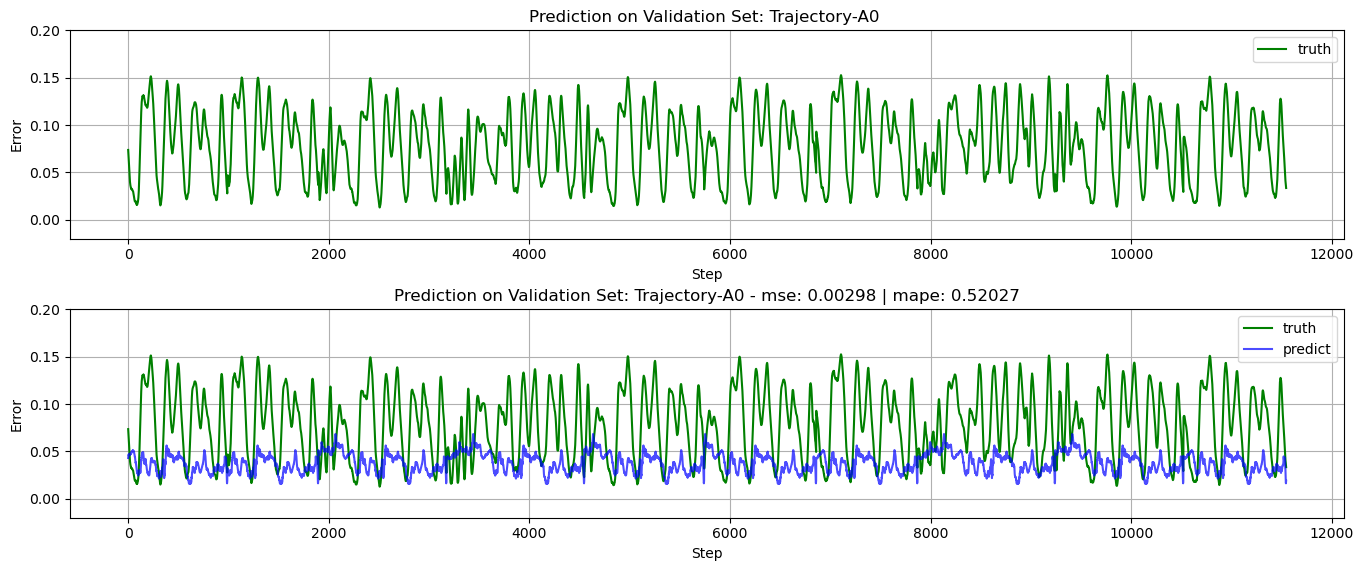

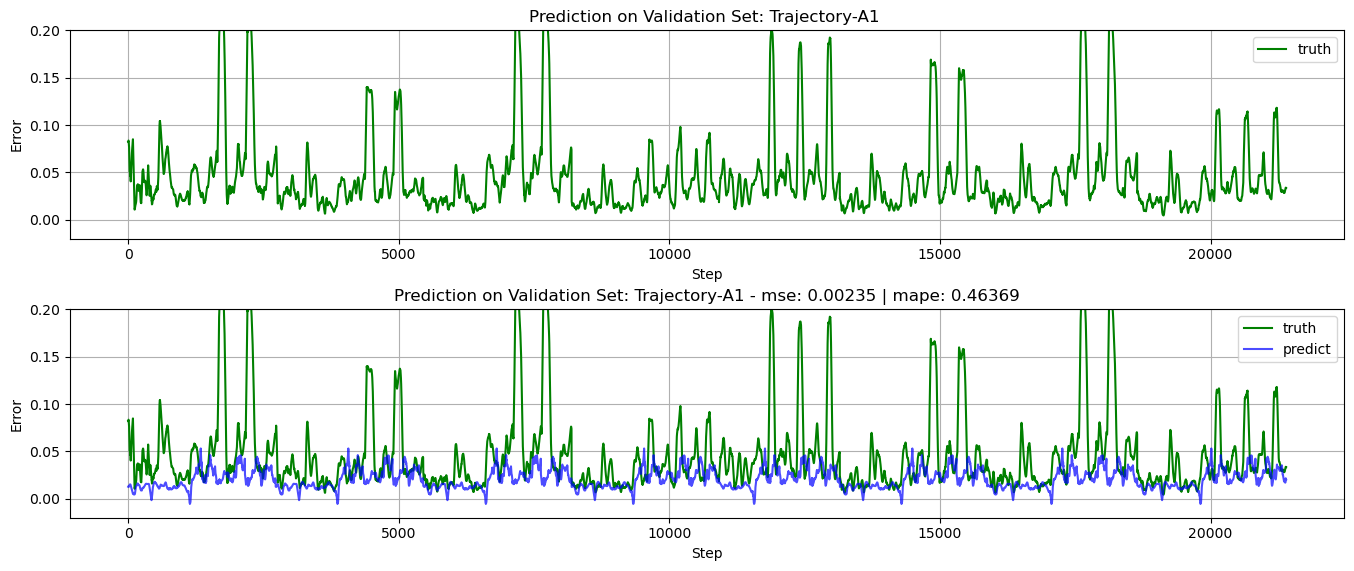

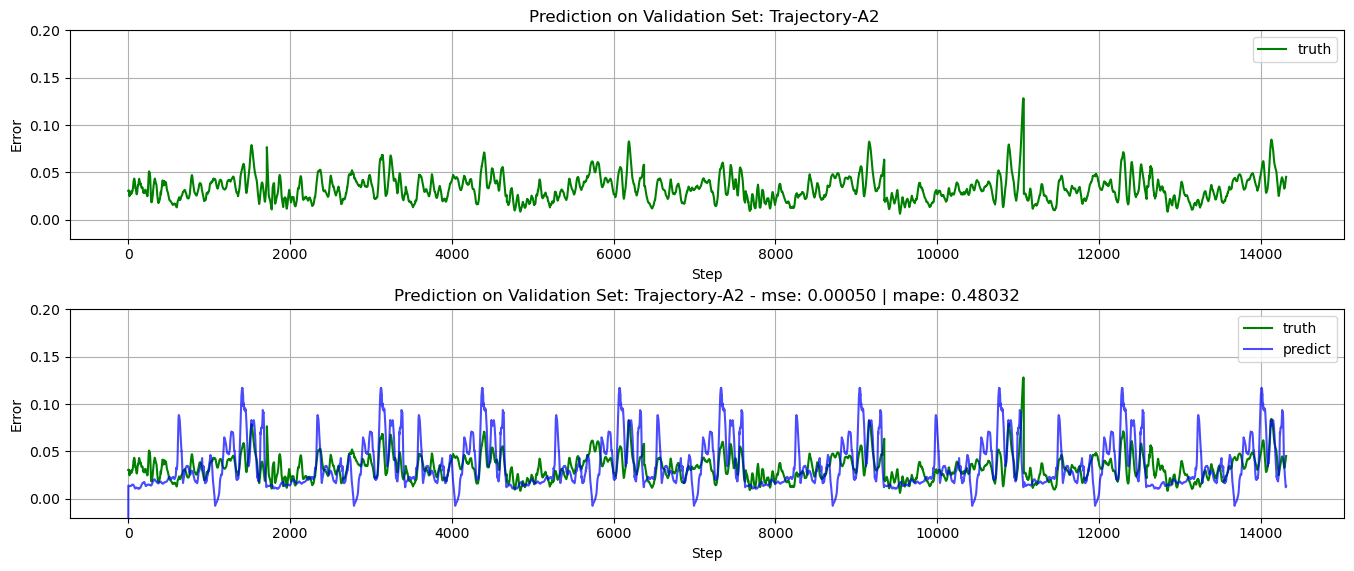

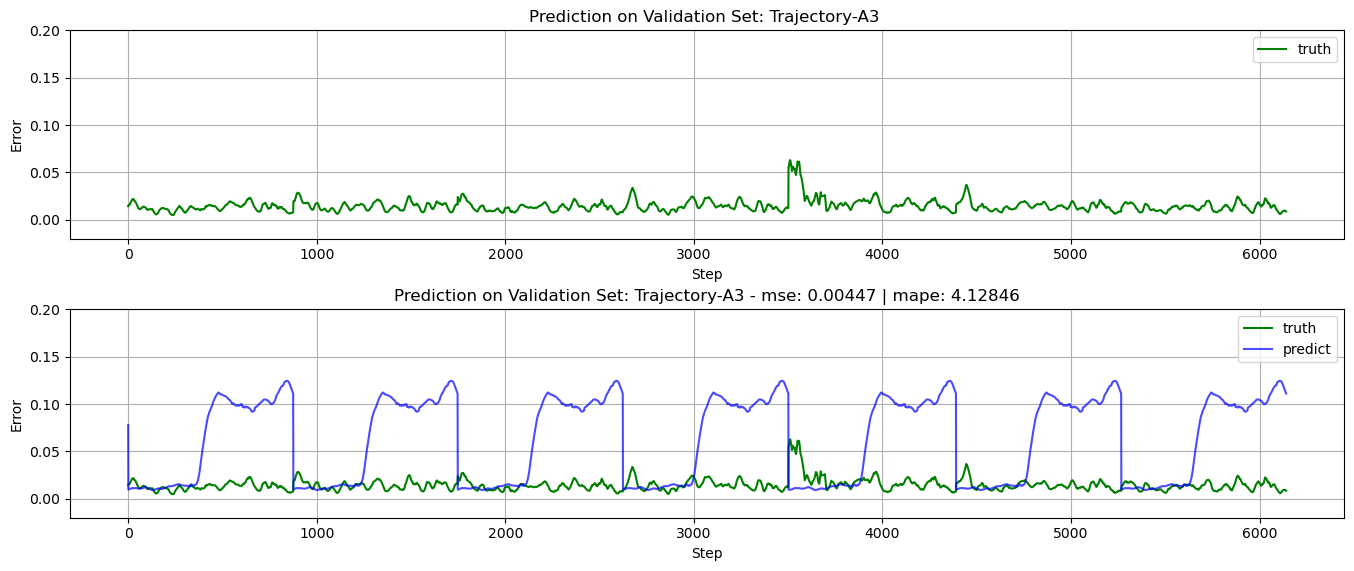

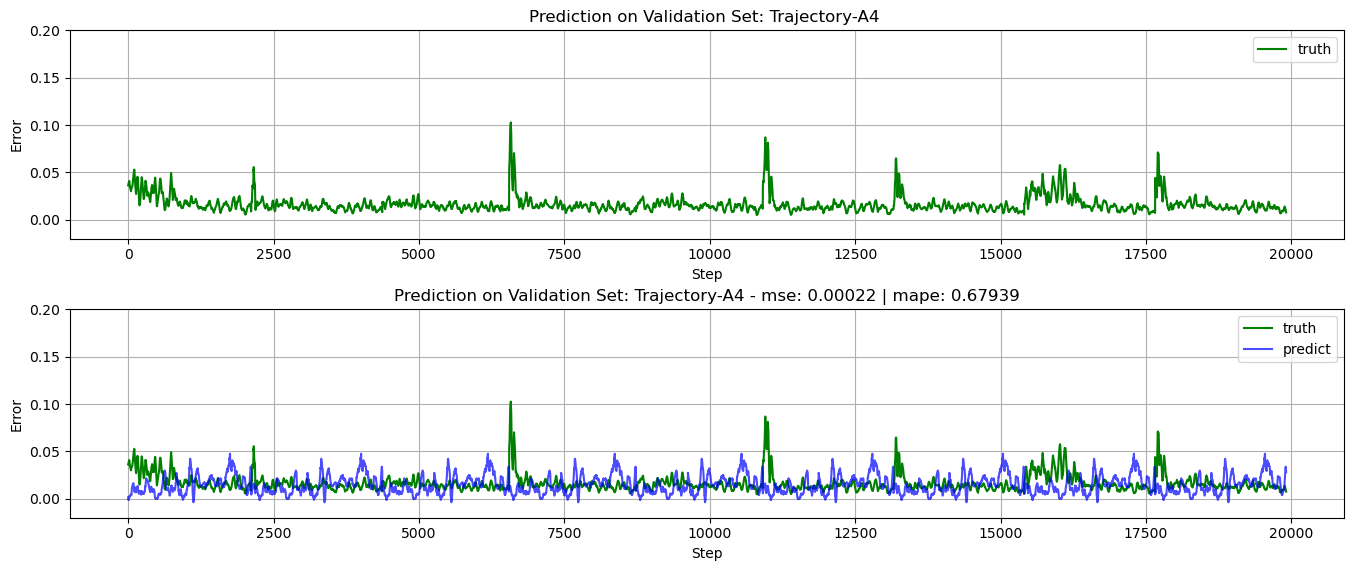

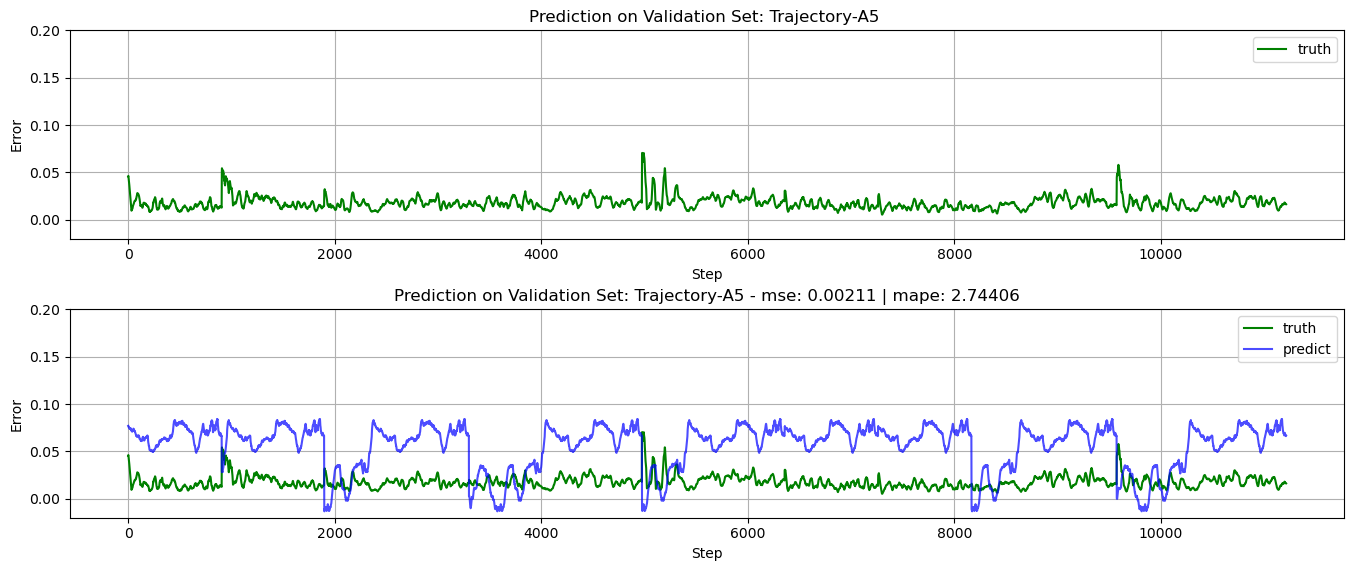

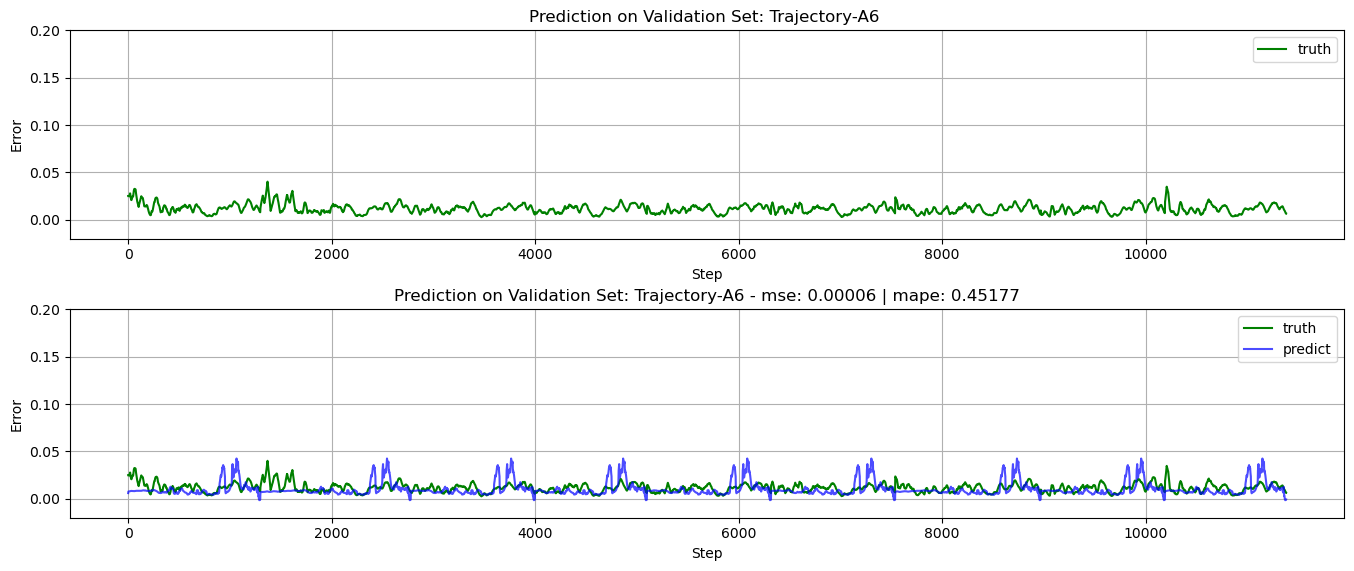

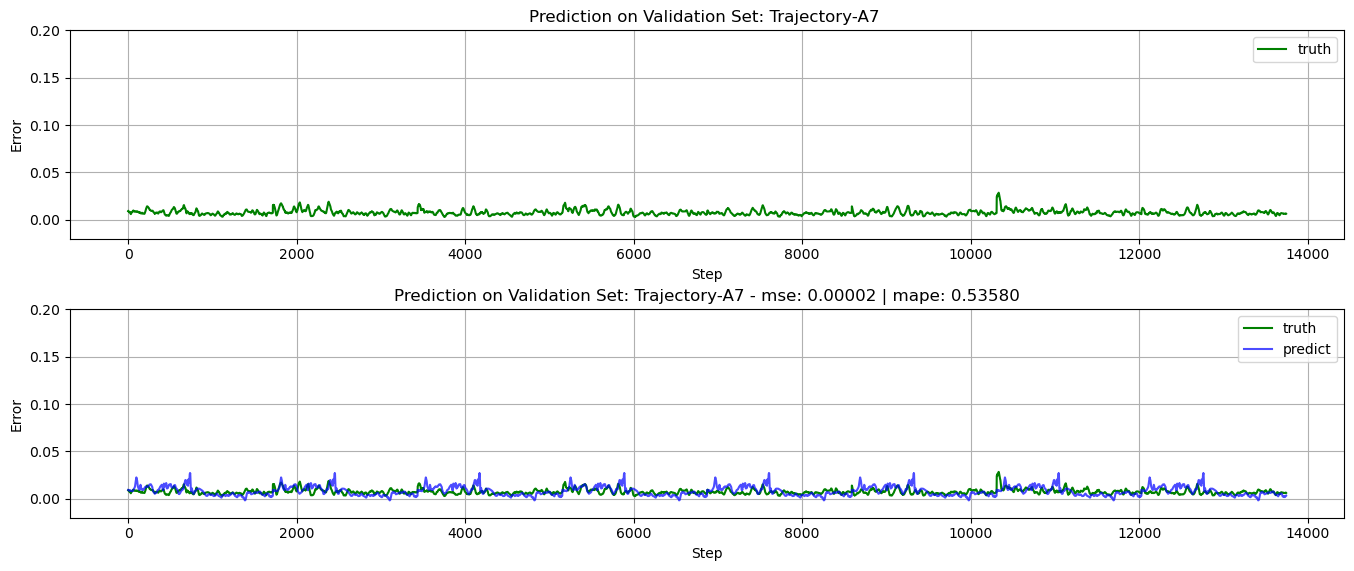

In [653]:
for idx in range(8):
    file_path = '/predictions/best_predictions_{}.npz'.format(idx)
    total_path = base_path + experiment + file_path
    
    pred = np.load(total_path, allow_pickle=True)
    
    y = np.concatenate(pred["targets"], axis=0)
    y_pred = np.concatenate(pred["predictions"], axis=0)

    visualize_output(y, y_pred, title='Prediction on Validation Set: Trajectory-A{} '.format(idx))